In [2]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from qiskit.quantum_info import Statevector

(x, y) =  0.9 -0.9


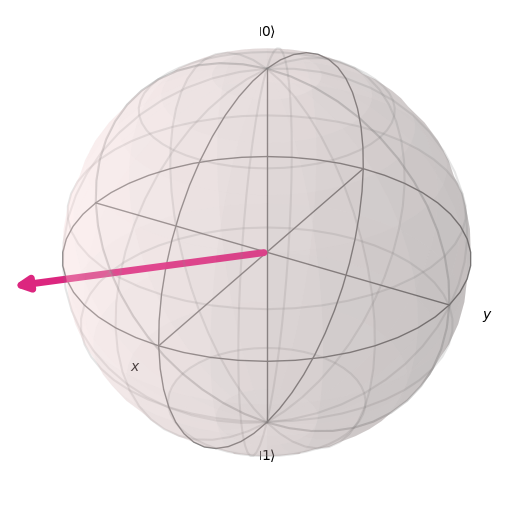

In [4]:
Q = np.array([0.9,-0.9,0])
phi = np.arctan2(Q[1],Q[0])
# Cartesian coordinate를 구하면서 Resize를 동시에 실행
x, y = np.real(np.cos(phi)), np.real(np.sin(phi))
q_x, q_y = Q[0], Q[1]

x, y = x * np.sqrt((q_x)**2+(q_y)**2) , y * np.sqrt((q_x)**2+(q_y)**2)

print("(x, y) = ", x, y)

plot_bloch_vector([x,y,0])


## Resize 1 X 1 Pixel and Represent 1 X 1 Pixel Again

In [ ]:
# QuantumCircuit을 통해 표현된 벡터는 basis vector가 |0>, |1> 이므로 
# 계수를 따로 구해서 각도를 얻어야함

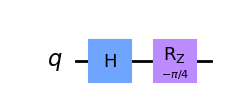

In [5]:
qc1 = QuantumCircuit(1)
qc1.h(0)
qc1.rz(phi,0)
qc1.draw('mpl')

Previous state =  Statevector([0.65328148+0.27059805j, 0.65328148-0.27059805j],
            dims=(2,))
phi =  (0.7853981633974484+0j)
Resized state =  Statevector([0.46193977+0.19134172j, 0.46193977-0.19134172j],
            dims=(2,))


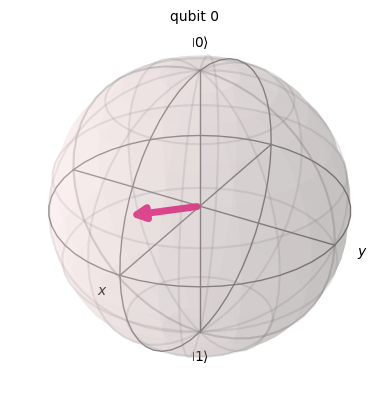

In [6]:
from math import cos, sin
state = Statevector.from_instruction(qc1)

print("Previous state = ", state)

t = 0
for i in range(2):
    t += state[i]

phi_bloch = 2 * np.arccos(np.sqrt(2) * t/2) # Rotation around Z-axis 의 경우 회전 각도의 절반이 exponential의 지수 term으로 들어가므로 마지막에 2배를 해줌.

print("phi = ", phi_bloch )

state = Statevector([state[0]/np.sqrt(2), state[1]/np.sqrt(2)] )

print("Resized state = ", state)

plot_bloch_multivector(state)

In [7]:
x, y = np.real(np.cos(phi_bloch)), np.real(np.sin(phi_bloch)) 
print("(x, y) = ", x, y)
x, y = x / np.sqrt(2) , y / np.sqrt(2)
plot_bloch_vector([x,y,0] )
Qixel = np.array([x,y,0])
print(x,y)

(x, y) =  0.7071067811865475 0.7071067811865476
0.49999999999999994 0.5


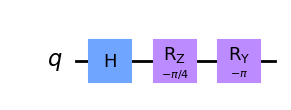

In [8]:
k = round(2 / (x**2 + y**2 + 1), 4)

P = np.array([k * x, k * y , k-1])

theta = - 2 * np.arccos(Q.dot(P) / 
                (np.sqrt((x**2 + y**2)) * np.sqrt(((k*x)**2 + (k*y)**2 + ((k-1)**2) ))))

qc1.ry(theta, 0)

qc1.draw('mpl')

In [9]:
print(theta, k)

-3.1415926535897936 1.3333


Statevector([ 0.65328148-0.27059805j, -0.65328148-0.27059805j],
            dims=(2,))


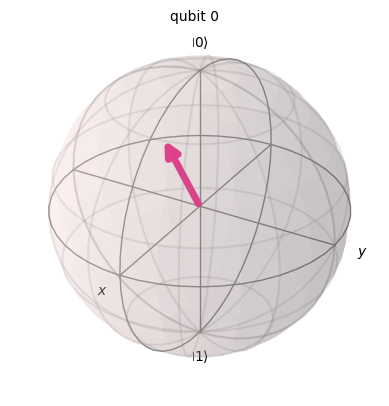

In [10]:
state = Statevector.from_instruction(qc1)
print(state)
plot_bloch_multivector(state)

In [11]:
def reproject_2(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    x_proj = round((np.cos(phi)/ np.tan(pi/2-theta/2)),4)
    y_proj = round((np.sin(phi)/ np.tan(pi/2-theta/2)),4)
    z_proj = 0

    a = np.cos(theta/2)
    b = complex(np.cos(phi),np.sin(phi))*np.sin(theta/2)
    print("( x_proj, y_proj, z_proj ) = ", (x_proj, y_proj, z_proj))

    return [x_proj, y_proj, z_proj]

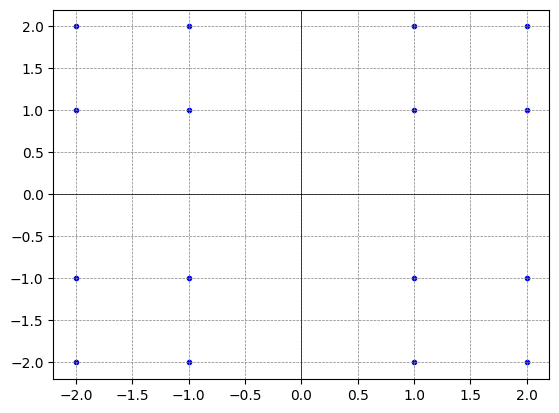

In [1]:
import matplotlib.pyplot as plt


x_points = list([-2,-1,1,2])
y_points = list([-2,-1,1,2])

grid_points = [(x, y) for x in x_points for y in y_points]


def plot_grid(grid_points):
    """격자점을 시각화"""
    x_values, y_values = zip(*grid_points)
    plt.scatter(x_values, y_values, marker='.', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# 격자 시각화
plot_grid(grid_points)

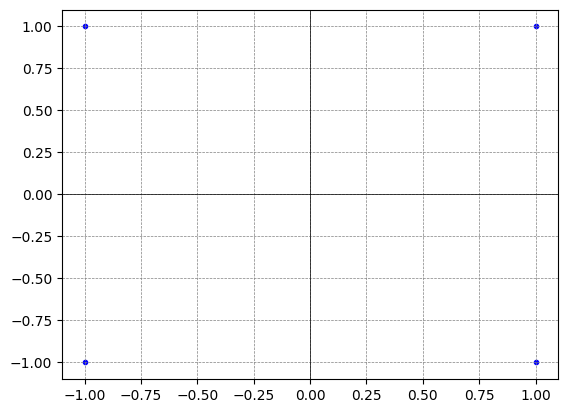

In [2]:
import matplotlib.pyplot as plt


x_points = list([-1,1])
y_points = list([-1,1])

grid_points = [(x, y) for x in x_points for y in y_points]


def plot_grid(grid_points):
    """격자점을 시각화"""
    x_values, y_values = zip(*grid_points)
    plt.scatter(x_values, y_values, marker='.', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# 격자 시각화
plot_grid(grid_points)